# **Preprocessing**

Reading training DF

In [0]:
# Training data of 400 songs
import pandas as pd

df = pd.read_csv('/content/final_italian_training_data.csv')
df.columns = ['Lyrics', 'Mood']
df.head()

,Lyrics,Mood
0,Le stelle sono buchi nel cielo\nDa cui filtra ...,Happy
1,Amore mio .. Non sai quante volte ho sognato.....,Sad
2,Piansero le deboli stelle\nTre angeli dipinti ...,Happy
3,Notte profonda senza luce in citt√†\nLe strade...,Sad
4,"Emi non andare via,\nIo sono ancora qua,\nCon ...",Sad


Encoding Mood Values

In [0]:
from sklearn.preprocessing import LabelEncoder
# import pickle
import numpy as np

x_train = df['Lyrics'].values 
y_train = df['Mood'].values

print('before: %s ...' %y_train[:20])

le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)

print('after: %s ...' %y_train[:20])

before: ['Happy' 'Sad' 'Happy' 'Sad' 'Sad' 'Sad' 'Happy' 'Sad' 'Sad' 'Sad' 'Happy'
 'Sad' 'Happy' 'Sad' 'Sad' 'Happy' 'Happy' 'Happy' 'Happy' 'Sad'] ...
after: [0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1] ...


In [0]:
!pip install nltk

Stemming (SnowballStemmer)

In [0]:
""" The following languages are supported: Danish, Dutch, English, Finnish, French, 
German, Hungarian, Italian, Norwegian, Portuguese, Romanian, Russian, Spanish 
and Swedish """
import nltk
import re
from nltk import word_tokenize
from nltk.stem import SnowballStemmer


def snowball_tokenizer(text, stemmer = SnowballStemmer('italian')):
  lower_txt = text.lower()
  tokens = nltk.wordpunct_tokenize(lower_txt)
  stemmed_text = [stemmer.stem(i) for i in tokens]
  no_punct = [s for s in stemmed_text if re.match('^[a-zA-Z]+$', s) is not None]
  return stemmed_text


snowball_tokenizer("Sono qui sto guardando questa storia dritta ne.")

# stemmed_text = [stemmer.stem(i) for i in word_tokenize(text)

['son', 'qui', 'sto', 'guard', 'quest', 'stor', 'dritt', 'ne', '.']

Stopwords File

In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stp = stopwords.words('italian')
with open('./stopwords_italian.txt', 'w') as outfile:
   outfile.write('\n'.join(stp))

with open('./stopwords_italian.txt', 'r') as infile:
    stop_words = infile.read().splitlines()
print('stop words %s ...' %stop_words[:5])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
stop words ['ad', 'al', 'allo', 'ai', 'agli'] ...


# **VECTORIZING METHODS**

## Feature extraction: Word counts and Vectorizers

Count Vectorizer

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(
            encoding='utf-8',
            decode_error='replace',
            strip_accents='unicode',
            analyzer='word',
            binary=False,
            stop_words=stop_words,
            tokenizer=snowball_tokenizer,
            ngram_range=(1,1)
    )

vocab = ["Sono qui sto guardando questa storia dritta ne."]

vec = vec.fit(vocab)

sentence1 = vec.transform([u'guardando questa storia ne.'])
sentence2 = vec.transform(['dritta'])


print('TEST:')
print('Vocabulary: %s' %vec.get_feature_names())
print('Sentence 1: %s' %sentence1.toarray())
print('Sentence 2: %s' %sentence2.toarray())

TEST:
Vocabulary: ['.', 'dritt', 'guard', 'quest', 'qui', 'son', 'stor']
Sentence 1: [[1 0 1 1 0 0 1]]
Sentence 2: [[0 1 0 0 0 0 0]]


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abbi', 'abbiam', 'avemm', 'avend', 'avess', 'avesser', 'avessim', 'avest', 'avet', 'avev', 'avevam', 'avra', 'avrann', 'avre', 'avrebb', 'avrebber', 'avrem', 'avremm', 'avrest', 'avret', 'avro', 'avut', 'com', 'contr', 'ebber', 'eran', 'erav', 'eravam', 'essend', 'fac', 'facc', 'facess', 'facessim', 'facest', 'fann', 'far', 'fara', 'farann', 'fare', 'farebb', 'farebber', 'farem', 'farest', 'fec', 'fecer', 'foss', 'fosser', 'fossim', 'fost', 'fumm', 'fur', 'hann', 'lor', 'nostr', 'perc', 'piu', 'qual', 'quant', 'quell', 'quest', 'sar', 'sara', 'sarann', 'sare', 

In [0]:
vec = vec.fit(x_train.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


TF-IDF Vectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
            encoding='utf-8',
            decode_error='replace',
            strip_accents='unicode',
            analyzer='word',
            binary=False,
            stop_words=stop_words,
            tokenizer=snowball_tokenizer
    )

In [0]:
tfidf = tfidf.fit(x_train.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abbi', 'abbiam', 'avemm', 'avend', 'avess', 'avesser', 'avessim', 'avest', 'avet', 'avev', 'avevam', 'avra', 'avrann', 'avre', 'avrebb', 'avrebber', 'avrem', 'avremm', 'avrest', 'avret', 'avro', 'avut', 'com', 'contr', 'ebber', 'eran', 'erav', 'eravam', 'essend', 'fac', 'facc', 'facess', 'facessim', 'facest', 'fann', 'far', 'fara', 'farann', 'fare', 'farebb', 'farebber', 'farem', 'farest', 'fec', 'fecer', 'foss', 'fosser', 'fossim', 'fost', 'fumm', 'fur', 'hann', 'lor', 'nostr', 'perc', 'piu', 'qual', 'quant', 'quell', 'quest', 'sar', 'sara', 'sarann', 'sare', 

# **Model Selection**

## **Models and F1-Score**

In [0]:
#Models: Multivariate Bernoulli and Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline

In [0]:
# Performance metric: F1-score

# Custom scorer methods to account for positive-negative class labels

from sklearn import metrics

# `pos_label` for positive class, since we have sad=1, happy=0

f1_scorer = metrics.make_scorer(metrics.f1_score, greater_is_better=True, pos_label=0)

## **Grid** **Search**

In [0]:
!pip install scikit-learn

In [0]:
# Grid Search with Count Vectorizer and Bernoulli Naive Bayes

from sklearn.model_selection import GridSearchCV
from pprint import pprint

pipeline_1 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', BernoulliNB())
])

parameters_1 = dict(
    vect__binary=[True],
    vect__stop_words=[stop_words, None],
    vect__tokenizer=[snowball_tokenizer, None],
    vect__ngram_range=[(1,1), (2,2), (3,3)],
)

grid_search_1 = GridSearchCV(pipeline_1, 
                           parameters_1, 
                           n_jobs=1, 
                           verbose=1,
                           scoring=f1_scorer,
                           cv=10                #Determines the cross-validation splitting strategy
                )


print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline_1.steps])
print("parameters:")
pprint(parameters_1, depth=2)
grid_search_1.fit(x_train, y_train)
print("Best score: %0.3f" % grid_search_1.best_score_)
print("Best parameters set:")
best_parameters_1 = grid_search_1.best_estimator_.get_params()
for param_name in sorted(parameters_1.keys()):
    print("\t%s: %r" % (param_name, best_parameters_1[param_name]))

Performing grid search...
pipeline: ['vect', 'clf']
parameters:
{'vect__binary': [True],
 'vect__ngram_range': [(...), (...), (...)],
 'vect__stop_words': [[...], None],
 'vect__tokenizer': [<function snowball_tokenizer at 0x7fc801c00510>, None]}
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abbi', 'abbiam', 'avemm', 'avend', 'avess', 'avesser', 'avessim', 'avest', 'avet', 'avev', 'avevam', 'avra', 'avrann', 'avre', 'avrebb', 'avrebber', 'avrem', 'avremm', 'avrest', 'avret', 'avut', 'com', 'contr', 'ebber', 'eran', 'erav', 'eravam', 'essend', 'fac', 'facc', 'facess', 'facessim', 'facest', 'fann', 'far', 'fara', 'farann', 'fare', 'farebb', 'farebber', 'farem', 'farest', 'fec', 'fecer', 'foss', 'fosser', 'fossim', 'fost', 'fumm', 'fur', 'hann', 'lor', 'nostr', 'perc', 'qual', 'quant', 'quell', 'quest', 'sar', 'sara', 'sarann', 'sare', 'sarebb', 'sarebber', 'sarem', 'sarest', 'siam', 'sian', 'siat', 'siet', 'son', 'stand', 'stann', 'star', 'stara', 'starann', 'stare', 'starebb', 'starebber', 'starem', 

Best score: 0.168
Best parameters set:
	vect__binary: True
	vect__ngram_range: (1, 1)
	vect__stop_words: None
	vect__tokenizer: <function snowball_tokenizer at 0x7fc801c00510>


In [0]:
# Grid Search with Count Vectorizer and Multinomial Naive Bayes

from sklearn.model_selection import GridSearchCV

pipeline_3 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB())
])

parameters_3 = dict(
    vect__binary=[False],
    vect__stop_words=[stop_words, None],
    vect__tokenizer=[snowball_tokenizer, None],
    vect__ngram_range=[(1,1), (2,2), (3,3)],
)

grid_search_3 = GridSearchCV(pipeline_3, 
                           parameters_3, 
                           n_jobs=1, 
                           verbose=1,
                           scoring=f1_scorer,
                           cv=10
                )


print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline_3.steps])
print("parameters:")
pprint(parameters_3, depth=2)
grid_search_3.fit(x_train, y_train)
print("Best score: %0.3f" % grid_search_3.best_score_)
print("Best parameters set:")
best_parameters_3 = grid_search_3.best_estimator_.get_params()
for param_name in sorted(parameters_3.keys()):
    print("\t%s: %r" % (param_name, best_parameters_3[param_name]))


Performing grid search...
pipeline: ['vect', 'clf']
parameters:
{'vect__binary': [False],
 'vect__ngram_range': [(...), (...), (...)],
 'vect__stop_words': [[...], None],
 'vect__tokenizer': [<function snowball_tokenizer at 0x7fc4e24482f0>, None]}
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abbi', 'abbiam', 'avemm', 'avend', 'avess', 'avesser', 'avessim', 'avest', 'avet', 'avev', 'avevam', 'avra', 'avrann', 'avre', 'avrebb', 'avrebber', 'avrem', 'avremm', 'avrest', 'avret', 'avut', 'com', 'contr', 'ebber', 'eran', 'erav', 'eravam', 'essend', 'fac', 'facc', 'facess', 'facessim', 'facest', 'fann', 'far', 'fara', 'farann', 'fare', 'farebb', 'farebber', 'farem', 'farest', 'fec', 'fecer', 'foss', 'fosser', 'fossim', 'fost', 'fumm', 'fur', 'hann', 'lor', 'nostr', 'perc', 'qual', 'quant', 'quell', 'quest', 'sar', 'sara', 'sarann', 'sare', 'sarebb', 'sarebber', 'sarem', 'sarest', 'siam', 'sian', 'siat', 'siet', 'son', 'stand', 'stann', 'star', 'stara', 'starann', 'stare', 'starebb', 'starebber', 'starem', 

Best score: 0.393
Best parameters set:
	vect__binary: False
	vect__ngram_range: (1, 1)
	vect__stop_words: None
	vect__tokenizer: <function snowball_tokenizer at 0x7fc4e24482f0>


In [0]:
# Grid Search with TfidfVectorizer and Bernoulli Naive Bayes
from sklearn.model_selection import GridSearchCV

pipeline_2 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', BernoulliNB())
])

parameters_2 = dict(
    vect__binary=[False],
    vect__stop_words=[stop_words, None],
    vect__tokenizer=[snowball_tokenizer, None],
    vect__ngram_range=[(1,1), (2,2), (3,3)],
)

grid_search_2 = GridSearchCV(pipeline_2, 
                           parameters_2, 
                           n_jobs=1, 
                           verbose=1,
                           scoring=f1_scorer,
                           cv=10
                )


print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline_2.steps])
print("parameters:")
pprint(parameters_2, depth=2)
grid_search_2.fit(x_train, y_train)
print("Best score: %0.3f" % grid_search_2.best_score_)
print("Best parameters set:")
best_parameters_2 = grid_search_2.best_estimator_.get_params()
for param_name in sorted(parameters_2.keys()):
    print("\t%s: %r" % (param_name, best_parameters_2[param_name]))

Performing grid search...
pipeline: ['vect', 'clf']
parameters:
{'vect__binary': [False],
 'vect__ngram_range': [(...), (...), (...)],
 'vect__stop_words': [[...], None],
 'vect__tokenizer': [<function snowball_tokenizer at 0x7fc4e24482f0>, None]}
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abbi', 'abbiam', 'avemm', 'avend', 'avess', 'avesser', 'avessim', 'avest', 'avet', 'avev', 'avevam', 'avra', 'avrann', 'avre', 'avrebb', 'avrebber', 'avrem', 'avremm', 'avrest', 'avret', 'avut', 'com', 'contr', 'ebber', 'eran', 'erav', 'eravam', 'essend', 'fac', 'facc', 'facess', 'facessim', 'facest', 'fann', 'far', 'fara', 'farann', 'fare', 'farebb', 'farebber', 'farem', 'farest', 'fec', 'fecer', 'foss', 'fosser', 'fossim', 'fost', 'fumm', 'fur', 'hann', 'lor', 'nostr', 'perc', 'qual', 'quant', 'quell', 'quest', 'sar', 'sara', 'sarann', 'sare', 'sarebb', 'sarebber', 'sarem', 'sarest', 'siam', 'sian', 'siat', 'siet', 'son', 'stand', 'stann', 'star', 'stara', 'starann', 'stare', 'starebb', 'starebber', 'starem', 

Best score: 0.265
Best parameters set:
	vect__binary: False
	vect__ngram_range: (1, 1)
	vect__stop_words: None
	vect__tokenizer: <function snowball_tokenizer at 0x7fc4e24482f0>


In [0]:
# Grid Search with TfidfVectorizer and Multinomial Naive Bayes
from sklearn.model_selection import GridSearchCV

pipeline_4 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

parameters_4 = dict(
    vect__binary=[False],
    vect__stop_words=[stop_words, None],
    vect__tokenizer=[snowball_tokenizer, None],
    vect__ngram_range=[(1,1), (2,2), (3,3)],
)

grid_search_4 = GridSearchCV(pipeline_4, 
                           parameters_4, 
                           n_jobs=1, 
                           verbose=1,
                           scoring=f1_scorer,
                           cv=10
                )


print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline_4.steps])
print("parameters:")
pprint(parameters_4, depth=2)
grid_search_4.fit(x_train, y_train)
print("Best score: %0.3f" % grid_search_4.best_score_)
print("Best parameters set:")
best_parameters_4 = grid_search_4.best_estimator_.get_params()
for param_name in sorted(parameters_4.keys()):
    print("\t%s: %r" % (param_name, best_parameters_4[param_name]))

Performing grid search...
pipeline: ['vect', 'clf']
parameters:
{'vect__binary': [False],
 'vect__ngram_range': [(...), (...), (...)],
 'vect__stop_words': [[...], None],
 'vect__tokenizer': [<function snowball_tokenizer at 0x7fc4e24482f0>, None]}
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abbi', 'abbiam', 'avemm', 'avend', 'avess', 'avesser', 'avessim', 'avest', 'avet', 'avev', 'avevam', 'avra', 'avrann', 'avre', 'avrebb', 'avrebber', 'avrem', 'avremm', 'avrest', 'avret', 'avut', 'com', 'contr', 'ebber', 'eran', 'erav', 'eravam', 'essend', 'fac', 'facc', 'facess', 'facessim', 'facest', 'fann', 'far', 'fara', 'farann', 'fare', 'farebb', 'farebber', 'farem', 'farest', 'fec', 'fecer', 'foss', 'fosser', 'fossim', 'fost', 'fumm', 'fur', 'hann', 'lor', 'nostr', 'perc', 'qual', 'quant', 'quell', 'quest', 'sar', 'sara', 'sarann', 'sare', 'sarebb', 'sarebber', 'sarem', 'sarest', 'siam', 'sian', 'siat', 'siet', 'son', 'stand', 'stann', 'star', 'stara', 'starann', 'stare', 'starebb', 'starebber', 'starem', 

Best score: 0.183
Best parameters set:
	vect__binary: False
	vect__ngram_range: (2, 2)
	vect__stop_words: None
	vect__tokenizer: <function snowball_tokenizer at 0x7fc4e24482f0>


In [0]:
# Grid SEarch Best Score = 0.
final_clf = Pipeline([
                ('vect', CountVectorizer(
                                         binary=False,
                                         stop_words=stop_words,
                                         tokenizer=snowball_tokenizer,
                                         ngram_range=(1,1),
                                         )
                ),
                ('clf', MultinomialNB(alpha=1.0)),
               ])
final_clf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abbi', 'abbiam', 'avemm', 'avend', 'avess', 'avesser', 'avessim', 'avest', 'avet', 'avev', 'avevam', 'avra', 'avrann', 'avre', 'avrebb', 'avrebber', 'avrem', 'avremm', 'avrest', 'avret', 'avut', 'com', 'contr', 'ebber', 'eran', 'erav', 'eravam', 'essend', 'fac', 'facc', 'facess', 'facessim', 'facest', 'fann', 'far', 'fara', 'farann', 'fare', 'farebb', 'farebber', 'farem', 'farest', 'fec', 'fecer', 'foss', 'fosser', 'fossim', 'fost', 'fumm', 'fur', 'hann', 'lor', 'nostr', 'perc', 'qual', 'quant', 'quell', 'quest', 'sar', 'sara', 'sarann', 'sare', 'sarebb', 'sarebber', 'sarem', 'sarest', 'siam', 'sian', 'siat', 'siet', 'son', 'stand', 'stann', 'star', 'stara', 'starann', 'stare', 'starebb', 'starebber', 'starem', 'starest', 'stav', 'stavam', 'stemm', 'stess', 'stesser', 'stessim', 'stest', 'st

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=['ad', 'al', 'allo', 'ai', 'agli',
                                             'all', 'agl', 'alla', 'alle',
                                             'con', 'col', 'coi', 'da', 'dal',
                                             'dallo', 'dai', 'dagli', 'dall',
                                             'dagl', 'dalla', 'dalle', 'di',
                                             'del', 'dello', 'dei', 'degli',
                                             'dell', 'degl', 'della', 'delle

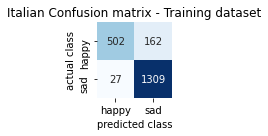

In [0]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm = metrics.confusion_matrix(y_train, final_clf.predict(x_train))

np.set_printoptions(suppress=True)
mpl.rc("figure", figsize=(4, 2))

hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['happy','sad'],
            xticklabels=['happy','sad'],
            cmap='Blues'
            )
plt.title('Italian Confusion matrix - Training dataset')
plt.ylabel('actual class')
plt.xlabel('predicted class')
plt.tight_layout()
plt.savefig('Italian_Training.eps', dpi=300)
plt.show()

In [0]:
from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np

df = pd.read_csv('/content/final_italian_testing_data.csv')
df.columns = ['Lyrics', 'Mood']
df.head()

X_valid = df['Lyrics'].values 
y_valid = df['Mood'].values


# le = LabelEncoder()
# le.fit(y_train)
y_valid = le.transform(y_valid)


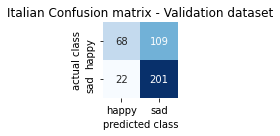

In [0]:
cm = metrics.confusion_matrix(y_valid, final_clf.predict(X_valid))

np.set_printoptions(suppress=True)
mpl.rc("figure", figsize=(4, 2))

hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['happy','sad'],
            xticklabels=['happy','sad'],
            cmap='Blues'
            )
plt.title('Italian Confusion matrix - Validation dataset')
plt.ylabel('actual class')
plt.xlabel('predicted class')
plt.tight_layout()
plt.savefig('Italian_Testing.eps', dpi=300)
plt.show()

In [0]:
# Custom scorer methods to account for positive-negative class labels

from sklearn import metrics

# `pos_label` for positive class, since we have sad=1, happy=0

acc_scorer = metrics.make_scorer(metrics.accuracy_score, greater_is_better=True)
pre_scorer = metrics.make_scorer(metrics.precision_score, greater_is_better=True, pos_label=0)
rec_scorer = metrics.make_scorer(metrics.recall_score, greater_is_better=True, pos_label=0)
f1_scorer = metrics.make_scorer(metrics.f1_score, greater_is_better=True, pos_label=0)

In [0]:
d = {'Data':['Training', 'Validation'],
     'ACC (%)':[],
     'PRE (%)':[],
     'REC (%)':[],
     'F1 (%)':[],
}

In [0]:
d['ACC (%)'].append(acc_scorer(estimator=final_clf, X=x_train, y_true=y_train))
d['PRE (%)'].append(pre_scorer(estimator=final_clf, X=x_train, y_true=y_train))
d['REC (%)'].append(rec_scorer(estimator=final_clf, X=x_train, y_true=y_train))
d['F1 (%)'].append(f1_scorer(estimator=final_clf, X=x_train, y_true=y_train))

d['ACC (%)'].append(acc_scorer(estimator=final_clf, X=X_valid, y_true=y_valid))
d['PRE (%)'].append(pre_scorer(estimator=final_clf, X=X_valid, y_true=y_valid))
d['REC (%)'].append(rec_scorer(estimator=final_clf, X=X_valid, y_true=y_valid))
d['F1 (%)'].append(f1_scorer(estimator=final_clf, X=X_valid, y_true=y_valid))

In [0]:
df_perform = pd.DataFrame(d)
df_perform = df_perform[['ACC (%)', 'PRE (%)', 'REC (%)', 'F1 (%)']]
df_perform.index=(['Training', 'Validation'])
df_perform = df_perform*100
df_perform = np.round(df_perform, decimals=2)
df_perform

,ACC (%),PRE (%),REC (%),F1 (%)
Training,90.55,94.90,75.60,84.16
Validation,67.25,75.56,38.42,50.94


In [0]:
df_perform.to_csv('italian_clf_performance.csv', index_label=False)